# Розпізнавання об'єктів на зображеннях з набору даних CIFAR-10

## prapare data

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import utils
from keras.preprocessing import image
from keras import regularizers
from keras.saving.model_config import model_from_json
from keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# Розмір міні-вибірки
batch_size = 128
# Кількість класів зображень
nb_classes = 10
# Кількість епох для навчання
nb_epoch = 100
# Розмір зображеннь
img_rows, img_cols = 32, 32
# Кількість каналів в зображенні 
img_channels = 3
# Назви класівз набору даних  CIFAR-10
classes=['літак', 'автомобіль', 'птиця', 'кіт', 'олень', 'собака', 'жаба', 'кінь', 'корабель', 'вантажівка']

## Підготовка даних

**Завантажуємо дані**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


**Перагляд прикладів даних**

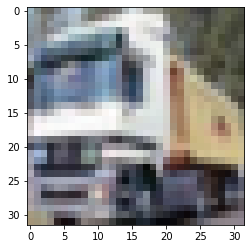

Номер класу: [9]
Тип об'єкту: вантажівка


In [ ]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класу:", y_train[n])
print("Тип об'єкту:", classes[y_train[n][0]])

**Нормалізуємо  дані**

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Перетворюємо вірні відповіді в формат one hot encoding**

In [ ]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Створюємо нейронну мережу

In [ ]:
# Створюємо послідовну модель
model = Sequential()

# First Conv layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second Conv layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third, fourth, fifth convolution layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

**Друкуємо інформацію щодо мережі**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 256)         0

**Компілюємо модель**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0003, decay=1e-6),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Навчаємо нейрону мережу

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/100
352/352 - 16s - loss: 2.2051 - accuracy: 0.1838 - val_loss: 1.8512 - val_accuracy: 0.3134 - 16s/epoch - 45ms/step
Epoch 2/100
352/352 - 15s - loss: 1.7492 - accuracy: 0.3510 - val_loss: 1.4490 - val_accuracy: 0.4880 - 15s/epoch - 41ms/step
Epoch 3/100
352/352 - 15s - loss: 1.4695 - accuracy: 0.4811 - val_loss: 1.1871 - val_accuracy: 0.5868 - 15s/epoch - 42ms/step
Epoch 4/100
352/352 - 15s - loss: 1.2716 - accuracy: 0.5628 - val_loss: 1.0504 - val_accuracy: 0.6356 - 15s/epoch - 42ms/step
Epoch 5/100
352/352 - 15s - loss: 1.1442 - accuracy: 0.6178 - val_loss: 0.9255 - val_accuracy: 0.6890 - 15s/epoch - 42ms/step
Epoch 6/100
352/352 - 15s - loss: 1.0486 - accuracy: 0.6561 - val_loss: 0.9398 - val_accuracy: 0.6882 - 15s/epoch - 42ms/step
Epoch 7/100
352/352 - 15s - loss: 0.9630 - accuracy: 0.6885 - val_loss: 0.8158 - val_accuracy: 0.7296 - 15s/epoch - 42ms/step
Epoch 8/100
352/352 - 15s - loss: 0.9064 - accuracy: 0.7107 - val_loss: 0.8101 - val_accuracy: 0.7440 - 15s/epoch - 42

## Оцінюємо якість  навчання мережі

In [ ]:
# Оцінюємо якість навчання моделі на тестових даних 
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точність роботи на тестових даних: %.2f%%" % (scores[1]*100))

Точність роботи на тестових даних: 82.26%


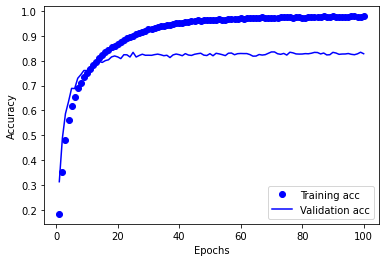

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Зберігаємо навчену нейрону мережу

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model1.h5")

In [ ]:
!ls

cifar10_model1.h5  cifar10_model.json  sample_data


In [ ]:
from google.colab import files

In [ ]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cifar10_model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Завантажуємо попередньо навчену нейронну мережу 


Завантажуємо файл з навченою моделлю 

In [ ]:
#!wget https://github.com/Kolyanuss/Lab_Univer/blob/master/Lab_4k_1sem/Recognise/lab4/cifar10_model1.h5
#!wget https://github.com/Kolyanuss/Lab_Univer/blob/master/Lab_4k_1sem/Recognise/lab4/cifar10_model.json
f = files.upload()


Saving cifar10_model.json to cifar10_model.json
Saving cifar10_model1.h5 to cifar10_model1.h5


Завантажуємо модель в пам'ять 

In [ ]:
json_file = open("cifar10_model.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights('cifar10_model1.h5')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 8, 8, 256)        

## Застосовуємо мережу для розпізнавання об'єктів на зображеннях 

**Перегляд зображення з набору даних для тестування**

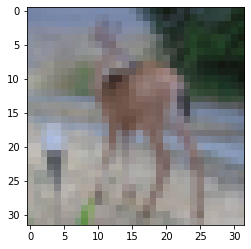

In [ ]:
index=100
plt.imshow(X_test[index])
plt.show()

### підготовка

**Перетворення тестового зображення**

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распізнавання**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 16ms/step


**Друкуємо результати розпізнавання**

In [ ]:
print(prediction)

[[1.6866928e-04 7.7620763e-07 1.6845949e-04 8.2829873e-05 1.2462311e-01
  2.9184742e-04 3.6317808e-06 8.7463105e-01 1.5016428e-06 2.8105756e-05]]


### результат

**Перетворюємо результати з формату one hot encoding**

In [ ]:
prediction = np.argmax(prediction)
print("Predict: ", classes[prediction])
print("Вірна відповідь: ", classes[y_test[index][0]])

Predict:  кінь
Вірна відповідь:  олень


## Розпізнаємо додаткове зображення

In [ ]:
files.upload()

Перевіряємо завантаження файлів

In [ ]:
!ls

 1000_545_1648468790-5163.webp
 1481348924.jpg
 16.png
 1-min-600x410.jpg
 24082-pochemu-passazhirskie-samolety-letayut-na-vysote-10-000-metrov.jpg.crdownload
 437317_1.jpg
 54190_1_1097.jpg
 57903_1_425.jpg
 630_360_1652062755-937.jpg
 7afa64d50b7bf999050fd91788b1e932.png
 800px-White-tailed_deer.jpg
 amerikanskij-bulli-obl.jpg
 canaan.jpg
 content.png
 f5296d75b46a7cc033b91bb4a14b43c9_preview_w440_h290.jpg
 gru1.jpg.crdownload
 gtline2.png
 igrushechnaja-mashinka-gruzovik-bol-shoj-orion-068.html-800x800.jpg
 Korabl-DSNS-7.png
 mgikzu---c4x3x50px50p-c4x3x50px50p--e037c74e14eaa755b69c0d3fe1df8eb1.jpg
 nzm-4837.jpg
 Olenn.jpg
 sample_data
 sobaka-bigl-960-960x540.jpg
'US_Navy_050827-N-9197B-234_The_USS_Mount_Whitney_(LCC_20),_is_underway_with_Sailors_and_Marines_from_the_newly_combined_staff_for_commander_Naval_Forces_Europe_and_.jpg'
 Кінь.jpg


**Дивимось завантажений малюнок**

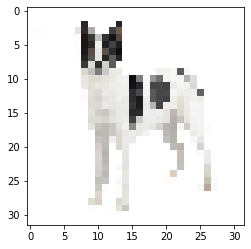

In [ ]:
img_path = 'canaan.jpg'
img = utils.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Перетворюємо малюнок в масив для розпізнавання**

In [ ]:
x = utils.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаємо розпізнавання**

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

1/1 [==============================] - 0s 24ms/step
літак
